<a href="https://colab.research.google.com/github/MarySelifanova/Aminoacid-translocations/blob/main/130421_aminoacid_enrichment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Open tables

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Install and import modules**

In [ ]:
!pip install bio
!pip install XlsxWriter
from Bio import SeqIO
from itertools import combinations
import numpy as np
import re
import pandas as pd
import xlsxwriter

In [19]:
import matplotlib.pyplot as plt

In [4]:
#define places for final tables
all_file = '/content/drive/MyDrive/Translocations/H1N1_H3N2_pdb_multiple_dictionaries.xlsx'
all_ev_file = '/content/drive/MyDrive/Translocations/H1N1_H3N2_simulation_2_dictionaries.xlsx'
H1N1_file = '/content/drive/MyDrive/Translocations/H1N1_stats_dictionaries.xlsx'
H1N1_ev_file = '/content/drive/MyDrive/Translocations/H1N1_evolver_stats_dictionaries.xlsx'
H3N2_file = '/content/drive/MyDrive/Translocations/H3N2_stats_dictionaries.xlsx'
H3N2_ev_file = '/content/drive/MyDrive/Translocations/H3N2_evolver_stats_dictionaries.xlsx'

In [5]:
#function for opening tables as lists of dataframes 

def open_tables(path_to_file):

  xls = pd.ExcelFile(path_to_file)
  df_list = []
  df_list.append(pd.read_excel(xls, 'len=1'))
  df_list.append(pd.read_excel(xls, 'len=2'))
  df_list.append(pd.read_excel(xls, 'len=3'))
  df_list.append(pd.read_excel(xls, 'len=4'))

  return df_list

In [6]:
#open all tables as lists of dataframes 

all_df = open_tables(all_file)
all_ev_df = open_tables(all_ev_file)

H1N1_df = open_tables(H1N1_file)
H1N1_ev_df = open_tables(H1N1_ev_file)

H3N2_df = open_tables(H3N2_file)
H3N2_ev_df = open_tables(H3N2_ev_file)

In [71]:
H3N2_ev_df[2]

,kmer,pos1,pos2,corr,leap,00,01,10,11,00_dictionary,01_dictionary,10_dictionary,11_dictionary


# Aminoacid enrichment

In [14]:
from collections import Counter

In [58]:
#function for counting frequency of aminoacids in: 1,2,3,4 - mers and all together
def aa_frequency(df_list):
  res_list = [] #list for counter dictionaries

  for d in df_list: #iterate through kmer lists
    kmer_list = list(d['kmer']) #take kmer column
    #print(kmer_list)
    kmer_list = [x for x in kmer_list if str(x) != 'nan']
    #kmer_list.remove(NaN)

    kmer_string = ''.join(kmer_list) #concatenate into one string
    #print(kmer_string)
    res = Counter(kmer_string) #count aminoacid frequencies
    res_list.append(res)
  return res_list

In [62]:
def plot_dict(res, name):
  labels, values = zip(*res.items())

  indexes = np.arange(len(labels))
  width = 0.8

  plt.bar(indexes, values, width)
  plt.xticks(indexes + width * 0.1, labels)
  plt.show()

  plt.savefig(name, dpi = 400)

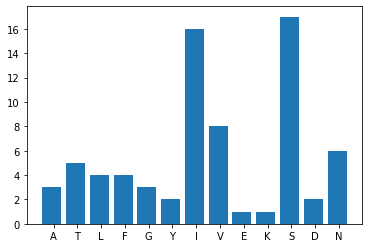

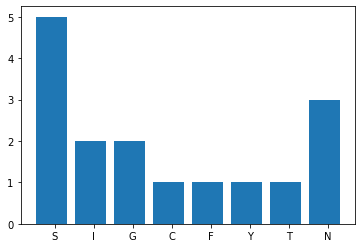

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [69]:
H3N2_ev_res_list = aa_frequency(H3N2_ev_df)

for j in range(len(H3N2_ev_res_list)):
  res = H3N2_ev_res_list[j]
  name = '/content/drive/MyDrive/Translocations/' + str(j) + '.png'
  plot_dict(res, name)

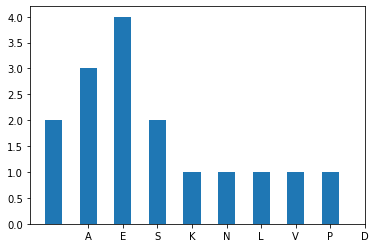

In [25]:
labels, values = zip(*res.items())

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 2, labels)
plt.show()